<a href="https://colab.research.google.com/github/mukulre/Projects/blob/main/Online_Shopping_Intention_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
# read the dataset
data = pd.read_csv('online_shoppers_intention.csv')

In [2]:
missing = data.isnull().sum()
print(missing)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [3]:
data.fillna(0, inplace = True)

In [4]:
x = data.iloc[:, [5, 6]].values
x.shape

(12330, 2)

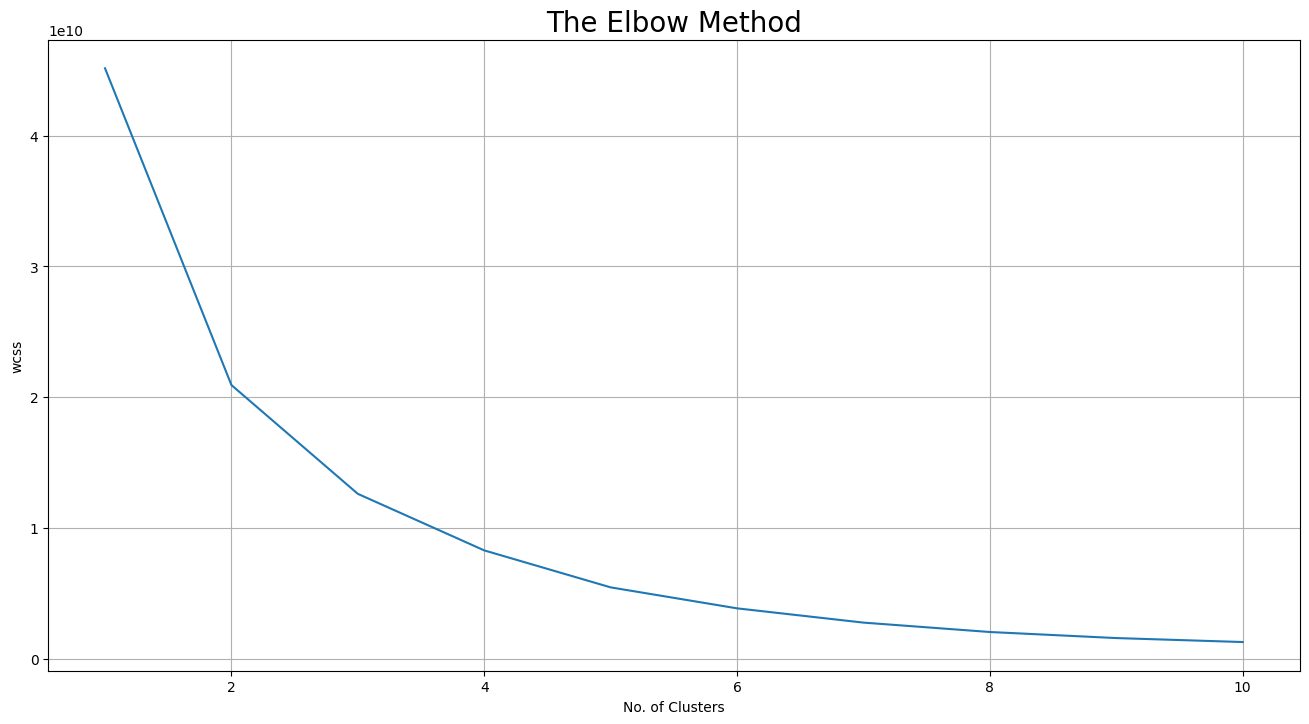

In [6]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              tol = 0.001) # Removed the invalid algorithm parameter
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (13, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

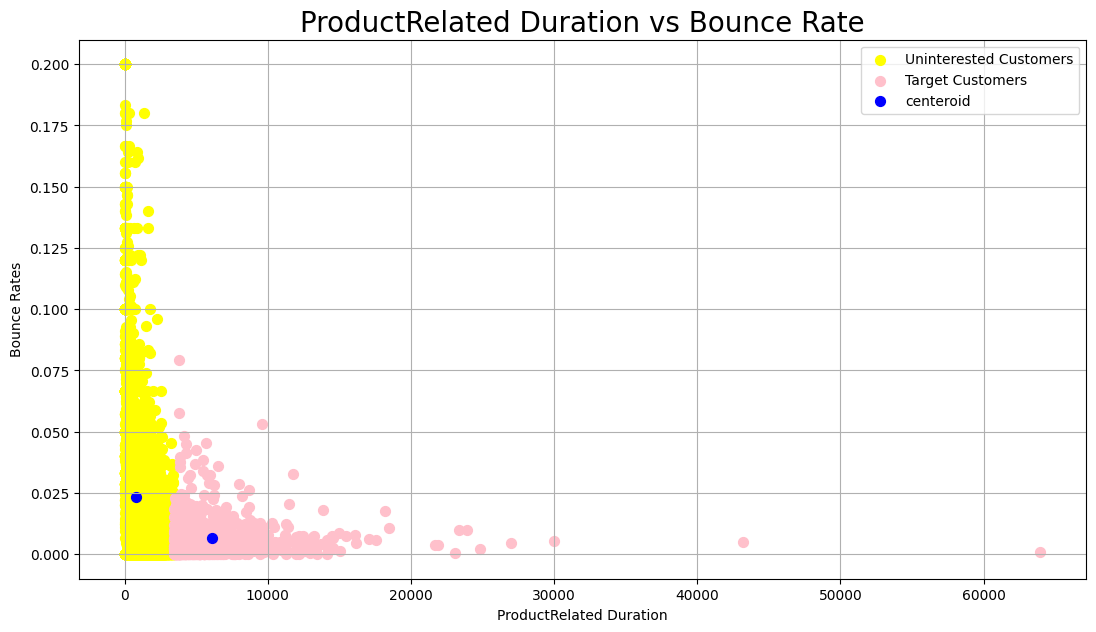

In [7]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
# get predicted cluster index for each sample: 0, 1, 2
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'yellow', label = 'Uninterested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'pink', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('ProductRelated Duration vs Bounce Rate', fontsize = 20)
plt.grid()
plt.xlabel('ProductRelated Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

In [16]:
!pip install scipy==1.11.4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import scikitplot as skplt
import scipy
print(scipy.__version__)

# Check if 'Revenue' exists
if 'Revenue' not in data.columns:
    print("Error: 'Revenue' column not found in dataset")
else:
    # Encode Revenue labels
    le = LabelEncoder()
    labels_true = le.fit_transform(data['Revenue'])  # Convert labels to numerical format

    # Ensure y_means is defined (it should contain predicted cluster labels)
    if 'y_means' not in globals():
        print("Error: 'y_means' variable not found. Ensure you have performed clustering.")
    else:
        labels_pred = y_means  # Clustering results

        # Compute Adjusted Rand Index (ARI) score
        score = metrics.adjusted_rand_score(labels_true, labels_pred)
        print("Adjusted Rand Index:", score)

        # Plot Confusion Matrix
        plt.figure(figsize=(8, 6))
        skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
        plt.show()

        # Normalized Confusion Matrix
        plt.figure(figsize=(8, 6))
        skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True)
        plt.show()

ImportError: cannot import name 'interp' from 'scipy' (/usr/local/lib/python3.11/dist-packages/scipy/__init__.py)